## Исследование данных о российском кинопрокате



#### Введение.

На основе двух датафреймов необходимо провести исследование о кинопрокате в Российской Федерации в период с 2010 по 2019 год. Одна таблица содержит данные о названии фильмов, прокатных удостоверениях, средствах государственной поддержки, а также рейтинг с сайта Кинопоиск. Вторая таблица содержит данные о прокате в кинотеатрах, т.е. кассовых сборах.

Требуется изучить эти таблицы, объединить их. Предобработать данные - изучить пропуски, проверить наличие дубликатов, изучить столбцы, содержащие категориальные значения, количественные значения, исправить выявленные проблемы, а также создать новые столбцы с данными, которые нам понадобятся в дальнейшем анализе.

Следует провести исследовательский анализ данных - изучить информацию о том, сколько выходило фильмов в прокат ежегодно, как менялась доля фильмов, имеющих информацию о прокате ежегодно, как менялась динамика проката, какие были сборы ежегодно, как влияет возрастная категория фильма на прокатные сборы, как они менялись ежегодно по категориям.

Отдельно необходимо исследовать фильмы, которые получили господдержку, посмотреть закономерности в данных. Нужно посмотреть сколько возвратных и невозвратных средств выделяет государство, их соотноршение. Посмотреть какая ежегодная окупаемость у этих фильмов.

**Описание данных**

Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 
- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.
Обратите внимание, что столбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. 

Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.
- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.

### Шаг 1. Откроем файлы с данными и объединим их в один датафрейм. 

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
try:
    data_1 = pd.read_csv('/datasets/mkrf_movies.csv')
except:
    data_1 = pd.read_csv('film_distribution/mkrf_movies.csv')
    
try:
    data_2 = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    data_2 = pd.read_csv('film_distribution/mkrf_shows.csv')

In [3]:
data_1.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
data_1.sort_values('puNumber',ascending=False).head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
5249,Мелодия для шарманки,231001111,2011-12-27T12:00:00.000Z,Художественный,Сота Синема Груп,Украина,Кира Муратова,Олег Кохан,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.7,драма
1011,ТотКтоПрошелСквозьОгонь,231001012,2015-04-23T12:00:00.000Z,Художественный,"Министерство культуры Украины, Государственное...",Украина,М.Ильенко,В.Филиппов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,"драма,приключения,биография"
3992,"Дэвид Гилмор ""Римемба Зет Найт""",226019110,2010-05-14T12:00:00.000Z,Художественный,Дэвид Гилмор Мьюзик,Великобритания,Дэвид Маллет,Дайоуни Орром,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.4,"триллер,драма,детектив"
4355,Первый рай,226017410,2010-05-04T12:00:00.000Z,Прочие,Би-Би-Си,Великобритания,Дэвид Аттенборо,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.4,"мультфильм,короткометражка,мелодрама"


In [5]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
data_1['puNumber'].unique()

array(['221048915', '111013716', '221038416', ..., '124010819',
       '124010619', '124010719'], dtype=object)

In [7]:
data_2.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [8]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Открыл два файла и изучил первую информацию. Объединять в один датафрейм необходимо по столбцу 'puNumber' (номер прокатного удостоверения), так как этот номер уникальный, присваивается каждому фильму и не может повторяться. Но в этих таблицах данный столбец имеет разный тип данных, поэтому в одной из них необходимо поменять тип данных этого столбца как в другой таблице. Логичнее поменять его в первой таблице на 'int', так как этот столбец содержит числовые значения. 

In [9]:
#data_1['puNumber'] = data_1['puNumber'].astype('int')data_1['puNumber'] = pd.to_numeric(data_1['puNumber'], errors='coerce')

Однако применив к столбцу метод astype() получили ошибку ValueError: invalid literal for int() with base 10: 'нет', что означает, что в столбце находятся не только числовые значения. Можно было использовать сдедующий метод преобразования `data_1['puNumber'] = pd.to_numeric(data_1['puNumber'], errors='coerce')`, но решили изменить тип данных этого столбца во второй таблице на 'str'.

In [10]:
data_2['puNumber'] = data_2['puNumber'].astype('str')
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   object 
 1   box_office  3158 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


#### Объедияем таблицы в один датафрейм. Так как первая таблица имеет больше строк чем вторая - присоединяем вторую тадлицу к первой методом `merge()`.

In [11]:
data = data_1.merge(data_2, how='left', on='puNumber')
data.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


In [12]:
len(data)

7486

Объединили две таблицы в новый датафрейм и проверили не увеличился ли датафрейм. Датафрейм имеет такой же размер как первая таблица.

In [13]:
data = data.rename(columns={'puNumber': 'pu_number'})
data.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

Изменили стиль написания столбца 'puNumber' на более аккуратный 'pu_number'. Названия остальных столбцов написаны аккуратно. Проверили исправление.

#### Вывод.
Изучив первую информацию, видно, что второй датафрейм короче первого. Поэтому приняли решение присоединить вторую таблицу к первой методом merge(). Длина датафрейма после объединения не изменилась. Дубликатов столбцов нет. Названия некоторых столбца с неаккуратным стилем исправили. 

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверяем типы данных

- Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Изучив типы данных в датафреме, пришли к выводу, что в некоторых столбцах тип данных необходимо заменить. Это необходимо сделать для дальнейшего анализа.

In [15]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%d %H:%M:%S')

In [16]:
data['refundable_support'] = data['refundable_support'].astype('Int64')

In [17]:
data['nonrefundable_support'] = data['nonrefundable_support'].astype('Int64')

In [18]:
data['budget'] = data['budget'].astype('Int64')

In [19]:
data['box_office'] = np.floor(pd.to_numeric(data['box_office'], errors='coerce')).astype('Int64')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   object             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    Int64              
 10  nonrefundable_support  332 non-null    Int64              
 11  budget                 332 non-null    Int64            

#### Шаг 2.2. Изучим пропуски в датафрейме

Исследуем таблицу на количество пропусков.

In [21]:
data.isnull().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Определили количество пропусков в каждом столбце. В 10 зи 15 столбцов есть пропуски. Изучим пропуски в каждорм столбце. В четырёх столбцах мы видим одинаковое количество пропусков, эти столбцы относятся к бюджетному финансированию, рассмотрим их взаимосвязь ниже.

Исследуем таблицы по очереди, для упрощения напишем функцию.

In [129]:
def info_data(name, data):
    print('*' * (len(name) + 8))
    print('\033[1m' + 'Таблица', name + '\033[0m')
    print('*' * (len(name) + 8))
    print('_' * 50)
    print('\033[1m' + 'Уникальные значения')
    display(data.unique())
    print('_' * 50)
    print('\033[1m' + 'Количество строк со значением')
    display(data.value_counts())
    print('\033[1m' + 'Количество строк с пропусками:', data.isna().sum().max())
    print('\033[1m' + 'Количество строк с пропусками, %:', round(data.isna().sum().max() / (data.count() + data.isna().sum().max()) * 100, 2))
    print('_' * 75)

##### Изучим столбец 'film_studio' (студия-производитель).

In [130]:
info_data('`film_studio`', data['film_studio'])

*********************
Таблица `film_studio`
*********************
__________________________________________________
Уникальные значения


array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

__________________________________________________
Количество строк со значением


Киностудия "Мосфильм"                                                                                                      345
ООО "Мульт в кино"                                                                                                          75
Анимаккорд Лтд                                                                                                              23
ООО "ТаББаК"                                                                                                                18
unknown                                                                                                                     18
                                                                                                                          ... 
Ностромо Пикчерз, Атресмедиа Чине, Динамо, Телефоника Студиос, Уорнер Бразерс                                                1
МортуСкрин, Игл Рок Интертейнмент                                                                              

Количество строк с пропусками: 0
Количество строк с пропусками, %: 0.0
___________________________________________________________________________


In [24]:
data_fs = data[data['film_studio'].isnull()]
data_fs

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.3,комедия,<NA>
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,4.0,"мультфильм,комедия",<NA>
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,41225
6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,NaN,6.9,"драма,криминал,детектив",<NA>
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>


In [25]:
data['film_studio'] = data['film_studio'].fillna('unknown')

В этом столбце пропуски заменили на значение 'unknown'. Количество пропусков всего 0,2%, и этот столбец в дальнейшем анализе не участвует, но в этих строках есть данные, которые будут исследованы, поэтому строки не удаляем.

##### Изучим столбец 'production_country' (страна-производитель).

In [26]:
info_data('`production_country`', data['production_country'])

****************************
Таблица `production_country`
****************************
__________________________________________________
Уникальные значения


array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

__________________________________________________
Количество строк со значением


США                                                                    2172
Россия                                                                 1821
СССР                                                                    347
Франция                                                                 301
Великобритания                                                          257
                                                                       ... 
Франция-Китай                                                             1
Россия, Германия, Великобритания                                          1
Великобритания - Италия - Испания                                         1
Россия-Ирландия                                                           1
Дания - Канада - Швеция - Франция - Германия - Великобритания - США       1
Name: production_country, Length: 950, dtype: int64

Количество строк с пропусками: 2
Количество строк с пропусками, %: 0.03
___________________________________________________________________________


In [27]:
data_pc = data[data['production_country'].isnull()]
data_pc

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,7.2,"детский,комедия",194527
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,unknown,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,4.0,"мультфильм,комедия",<NA>


In [28]:
data['production_country'] = data['production_country'].fillna('Россия')

В этом столбце всего два пропуска (0,03%). Известно, что эти сериалы выпускаются в России, поэтому пропуски заполняем словом 'Россия'.

##### Изучим столбец 'director' (режиссёр).

In [29]:
info_data('`director`', data['director'])

******************
Таблица `director`
******************
__________________________________________________
Уникальные значения


array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

__________________________________________________
Количество строк со значением


О.Семёнова                  47
Д.Червяцов                  17
Стивен Содерберг            17
Ридли Скотт                 16
Тиль Швайгер                14
                            ..
Том Коркоран                 1
Е.Сергеев                    1
Фернандо Гонзалез Молина     1
Е.Перволовичи                1
И.Трусов                     1
Name: director, Length: 4811, dtype: int64

Количество строк с пропусками: 9
Количество строк с пропусками, %: 0.12
___________________________________________________________________________


In [30]:
data_d = data[data['director'].isnull()]
data_d

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,NaN,NaN,44350
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,7.9,"концерт,музыка",<NA>
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,unknown,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,4.0,"мультфильм,комедия",<NA>
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,6.7,"концерт,музыка",<NA>


In [31]:
data['director'] = data['director'].fillna('unknown')

В этом столбце корректно заполнить пропуски нельзя, пропусков мало - 0,12%, заменяем их значением 'unknown', эти данные нам для анализа не понадобятся.

##### Изучим столбец 'producer' (продюсер).

In [32]:
info_data('`producer`', data['producer'])

******************
Таблица `producer`
******************
__________________________________________________
Уникальные значения


array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', nan,
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

__________________________________________________
Количество строк со значением


П.Смирнов                                                                     67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина                                 28
С.Сельянов                                                                    18
Д.Ловейко, О.Кузовков                                                         17
Тони Майерс                                                                   11
                                                                              ..
Б.Гуц, А.Гусенцова                                                             1
Лоран Петен, Мишель Петен                                                      1
 ООО "КиноФирма"                                                               1
Э.Илоян, В.Шляппо, А.Троцюк, Д.Жалинский, Д.Дьяченко, М.Ткаченко, А.Рубцов     1
Дженнифер Додж                                                                 1
Name: producer, Length: 5349, dtype: int64

Количество строк с пропусками: 568
Количество строк с пропусками, %: 7.59
___________________________________________________________________________


In [33]:
data_p = data[data['producer'].isnull()]
data_p

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,NaN,6.6,"драма,военный",<NA>
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,NaN,7.7,драма,<NA>
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,8.3,"мелодрама,комедия",2700
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,7.8,"мелодрама,комедия",<NA>
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,7.8,"боевик,драма,приключения",<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,Отряд специального назначения,111020419,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,NaN,7.0,"приключения,военный",<NA>
7406,Назначаешься внучкой,111020519,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,7.0,военный,<NA>
7407,Перед рассветом,111020619,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.9,"драма,мелодрама",<NA>
7408,Ты помнишь,111020719,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,NaN,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,7.0,"драма,мелодрама,военный",<NA>


In [34]:
data['producer'] = data['producer'].fillna('unknown')

В этом столбце 7,6% пропусков. Изучив столбец стало ясно, что подавляющее количество фильмов с пропусками в этом столбце были сняты в СССР или другими соцстранами, а тогда в этих странах продюсеров как таковых не было, соответственно их имена не указывались. Поэтому пропуски заполняем значением 'unknown', в дальнейшем анализе эти данные не используются.

##### Изучим столбец 'refundable_support' (объём возвратных средств государственной поддержки).

In [35]:
info_data('`refundable_support`', data['refundable_support'])

****************************
Таблица `refundable_support`
****************************
__________________________________________________
Уникальные значения


<IntegerArray>
[     <NA>,         0,  50000000,  26000000,  30000000,  15000000,  10000000,
  20000000,   7153119,  25000000,  40000000,  60000000,  44000000,  29000000,
  41000000,  36000000,   3500000,   5000000,  19000000,   9000000, 110000000,
  17000000,  75000000, 150000000,  38000000, 100000000,  55000000,   7000000,
   7346881,   8000000, 115000000,  35000000, 180000000,  28000000,  80000000]
Length: 35, dtype: Int64

__________________________________________________
Количество строк со значением


0            221
20000000      12
10000000      10
25000000      10
5000000        9
15000000       9
40000000       8
50000000       8
30000000       7
60000000       6
100000000      5
55000000       2
75000000       2
110000000      2
19000000       2
3500000        1
26000000       1
28000000       1
180000000      1
35000000       1
115000000      1
8000000        1
7346881        1
7000000        1
7153119        1
36000000       1
38000000       1
150000000      1
44000000       1
17000000       1
29000000       1
9000000        1
41000000       1
80000000       1
Name: refundable_support, dtype: Int64

Количество строк с пропусками: 7154
Количество строк с пропусками, %: 95.57
___________________________________________________________________________


In [36]:
data_rs = data[data['refundable_support'].notnull()]
data_rs

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0,26500000,79411900,Министерство культуры,8.1,"драма,мелодрама",365353
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0,26000000,37142857,Министерство культуры,NaN,NaN,28140
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0,107847945,176023490,Фонд кино,5.3,"комедия,фантастика",19957031
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0,28000000,40574140,Министерство культуры,4.2,драма,55917
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0,25000000,40015122,Министерство культуры,6.4,драма,232100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000,400000000,980000000,Фонд кино,6.0,"история,биография,драма",717703185
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000,0,190000000,Фонд кино,6.7,"мультфильм,приключения,семейный",501069235
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000,400000000,944000000,Фонд кино,5.7,"фантастика,боевик",<NA>
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0,30000000,46154000,Министерство культуры,5.9,драма,<NA>


Выше мы отмечали, что 4 столбца, имеющие отношение к государственному финансированию, имеют одинаковое количество пропусков. Как видно из таблицы эти 4 столбца полностью взаимосвязаны, пропуски одних и тех же строках, поэтому пропуски - 95,6% оставляем незаполненными, эта информация нам понадобится в дальнейшем исследовании.

##### Изучим столбец 'ratings' (рейтинг фильма на КиноПоиске).

In [37]:
info_data('`ratings`', data['ratings'])

*****************
Таблица `ratings`
*****************
__________________________________________________
Уникальные значения


array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

__________________________________________________
Количество строк со значением


6.6    312
6.7    308
6.8    261
7.2    252
6.2    243
      ... 
19%      1
90%      1
62%      1
64%      1
9.1      1
Name: ratings, Length: 94, dtype: int64

Количество строк с пропусками: 967
Количество строк с пропусками, %: 12.92
___________________________________________________________________________


In [38]:
data_rating = data[data['ratings'].notnull()]
data_rating

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,<NA>,<NA>,<NA>,NaN,7.2,"боевик,драма,мелодрама",<NA>
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,NaN,6.6,"драма,военный",<NA>
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,<NA>,<NA>,<NA>,NaN,6.8,"фантастика,боевик,триллер",<NA>
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,<NA>,<NA>,<NA>,NaN,6.8,"фантастика,боевик,триллер",<NA>
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,<NA>,<NA>,<NA>,NaN,6.8,"фантастика,боевик,триллер",<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0,30000000,46154000,Министерство культуры,5.9,драма,<NA>
7477,Тридцать,121038419,2019-12-26 12:00:00+00:00,Художественный,Демнехст ауф видео,Германия,Симона Костова,Джейлан Атаман-Джека,«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,6.3,драма,<NA>
7478,(Не)идеальный мужчина,111023119,2019-12-24 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,40000000,60000000,150147502,Фонд кино,4.5,"комедия,фантастика,мелодрама",<NA>
7482,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,5.4,"боевик,триллер",<NA>


In [39]:
data_ratings = data_rating[data_rating['ratings'].str.contains('%')]

In [40]:
len(data_ratings)

29

In [41]:
len(data_ratings) / len(data) * 100

0.38738979428266096

In [42]:
data_ratings

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29 12:00:00+00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,99%,"ужасы,триллер,драма",<NA>
811,От винта!,114000212,2012-08-06 12:00:00+00:00,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,28%,"детский,приключения,комедия",1740
1053,Песочный человек,121029212,2012-11-29 12:00:00+00:00,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,97%,"ужасы,фантастика,фэнтези",<NA>
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00+00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,NaN,99%,"триллер,драма,детектив",<NA>
1805,Спираль.,111001014,2014-01-30 12:00:00+00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,99%,"аниме,мультфильм,ужасы",4295
1874,Короткие истории о любви 2,121002615,2015-02-13 12:00:00+00:00,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,<NA>,<NA>,<NA>,NaN,83%,NaN,1429859
1899,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-27 12:00:00+00:00,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,NaN,64%,"мюзикл,фэнтези,мелодрама",528732557
2126,Поездка к матери,111002015,2015-03-02 12:00:00+00:00,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,91%,"драма,семейный",0
2146,Главный,111003415,2015-03-27 12:00:00+00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0,10000000,40000000,Министерство культуры,94%,"фантастика,боевик,комедия",334750
2438,Самый рыжий Лис,111012715,2015-07-30 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,NaN,62%,"фэнтези,семейный",<NA>


In [43]:
data['ratings'] = data['ratings'].replace('.+%', np.nan, regex=True)

In [44]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6', '3.8',
       '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7', '4.9',
       '3.9', '2.7', '3.3', '2.9', '3.7', '1.4', '3.1', '3.5', '3.2',
       '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1', '3.6', '1.0',
       '1.3', '1.9', '1.8', '1.2', '1.7', '9.0', '8.9', '9.1'],
      dtype=object)

In [45]:
data['ratings'].isnull().sum()

996

In [46]:
data['ratings'].isnull().sum() / len(data) * 100

13.304835693294148

In [47]:
data['ratings'] = data['ratings'].astype('float64')

In [48]:
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   object             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7486 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    Int64              
 10  nonrefundable_support  332 non-null    Int64              
 11  budget                 332 non-null    Int64            

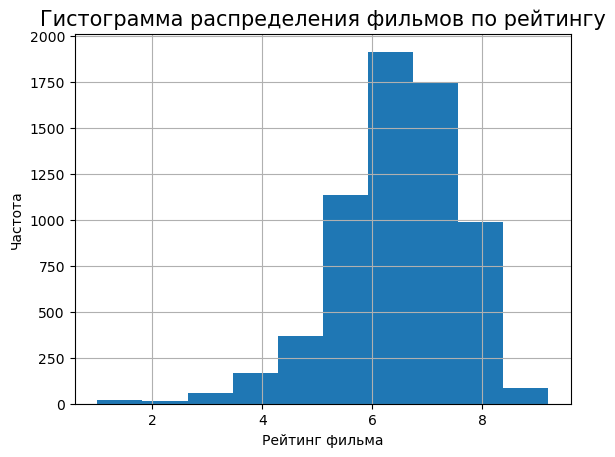

In [50]:
data['ratings'].hist()
plt.xlabel('Рейтинг фильма', fontsize=10)
plt.ylabel('Частота', fontsize=10)
plt.title('Гистограмма распределения фильмов по рейтингу', fontsize=15)
plt.show()

In [51]:
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

Столбец содержит 12,9% пропусков, еще 0.4% некорректных значений - значения в процентах со знаком '%'. Было принято решение эти значения удалить, получилось 13,3% пропусков. Пропуски в этом столбце заполнять корректно не получится, поэтому их оставляем. Тип данных преобразовали в вещественный.

##### Изучим столбец 'genres' (жанр фильма).

In [52]:
info_data('`genres`', data['genres'])

****************
Таблица `genres`
****************
__________________________________________________
Уникальные значения


array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

__________________________________________________
Количество строк со значением


драма                           476
комедия                         352
мелодрама,комедия               222
драма,мелодрама,комедия         189
драма,мелодрама                 183
                               ... 
мюзикл,фэнтези,семейный           1
мюзикл,мелодрама,фэнтези          1
документальный,новости,драма      1
семейный,детектив,детский         1
мелодрама,история,драма           1
Name: genres, Length: 742, dtype: int64

Количество строк с пропусками: 976
Количество строк с пропусками, %: 13.04
___________________________________________________________________________


In [53]:
data_g = data[data['genres'].isnull()]
data_g

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",unknown,«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,unknown,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,unknown,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,Эколав,111023219,2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00+00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,219569
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,<NA>,<NA>,<NA>,NaN,NaN,NaN,<NA>


In [54]:
data['genres'] = data['genres'].fillna('unknown')

В этом столбце 13% пропусков. Заполнять пропуски здесь корректно не получится, заполняем их заглушкой 'unknown'.

##### Изучим столбец 'box_office' (сборы в рублях).

In [55]:
info_data('`box_office`', data['box_office'])

********************
Таблица `box_office`
********************
__________________________________________________
Уникальные значения


<IntegerArray>
[     <NA>,      2700,       360,       420,       380,      1165,     22660,
     84720,      1795,       300,
 ...
    129500,   4540375,   1032821,   4963920,    367224, 717703185, 501069235,
   3143790,  18001772,    219569]
Length: 2939, dtype: Int64

__________________________________________________
Количество строк со значением


0           24
200         13
300         12
360          9
500          8
            ..
60531051     1
2060823      1
1544985      1
322284       1
219569       1
Name: box_office, Length: 2938, dtype: Int64

Количество строк с пропусками: 4328
Количество строк с пропусками, %: 57.81
___________________________________________________________________________


In [56]:
data['box_office'].sort_values(ascending=False)

7456    3073568690
5653    2779686144
6820    2576613776
6549    2271754004
3488    2118396119
           ...    
7481          <NA>
7482          <NA>
7483          <NA>
7484          <NA>
7485          <NA>
Name: box_office, Length: 7486, dtype: Int64

In [57]:
data.loc[7456]

title                                                                Холоп
pu_number                                                        111021719
show_start_date                                  2019-12-19 12:00:00+00:00
type                                                        Художественный
film_studio                        ООО "МЕМ-МЕДИА" по заказу АО "ВБД Груп"
production_country                                                  Россия
director                                                         К.Шипенко
producer                 Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...
age_restriction                            «12+» - для детей старше 12 лет
refundable_support                                                25000000
nonrefundable_support                                             35000000
budget                                                           160000000
financing_source                                                 Фонд кино
ratings                  

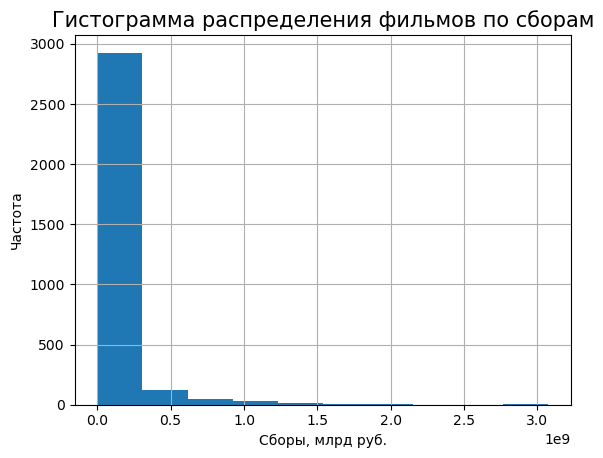

In [58]:
data['box_office'].hist()
plt.xlabel('Сборы, млрд руб.', fontsize=10)
plt.ylabel('Частота', fontsize=10)
plt.title('Гистограмма распределения фильмов по сборам', fontsize=15)
plt.show()

In [59]:
data_bo = data[data['box_office'].notnull()]
data_bo

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,unknown,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,8.3,"мелодрама,комедия",2700
18,Неподдающиеся,111003616,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,unknown,«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,NaN,8.0,"мелодрама,комедия",360
19,Неподсуден,111003716,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",unknown,«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,NaN,7.7,драма,420
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,unknown,«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,NaN,8.7,"комедия,мелодрама,криминал",380
38,Мужики!..,111007213,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,unknown,«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,NaN,8.1,драма,1165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000,400000000,980000000,Фонд кино,6.0,"история,биография,драма",717703185
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000,0,190000000,Фонд кино,6.7,"мультфильм,приключения,семейный",501069235
7471,Реальная любовь в Нью-Йорке,121038219,2019-12-19 12:00:00+00:00,Художественный,"Креатив Энлэйнс, Арт, Копенгаген Филм, Дет Дан...",Дания - Канада - Швеция - Франция - Германия -...,Лоне Шерфиг,"Малене Бленков, Сандра Каннингэм",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,6.1,драма,3143790
7472,Черное Рождество,121038319,2019-12-19 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Блюмхауз Продакшнз, Дивид/К...",США - Новая Зеландия,Софи Такал,Джесси Хендерсон,«18+» - запрещено для детей,<NA>,<NA>,<NA>,NaN,3.9,"ужасы,триллер,детектив",18001772


В этом столбце 57,8% пропусков в данных. Этот столбец из второй таблицы, которую мы объединили с первой, наиболее полной таблицей. В этом столбце очень большой разброс в количестве прокатных сборов. Это, как видно из таблицы, объяснимо. Чем старше фильм - тем ниже сбор. Фильмы, снятые еще в СССР имеют наименьший сбор, тогда как наибольший сбор был у российского фильма "Холоп".

#### Шаг 2.3. Изучим дубликаты в датафрейме

##### Поверяем таблицу на наличие явных дубликатов.

In [60]:
data.duplicated().sum()

0

Явных дубликатов не обнаружено.

##### Изучаем столбец 'pu_number' (номер прокатного удостоверения) на наличие неявных дубликатов.

In [61]:
data['pu_number'].value_counts()

221054410    2
221154310    2
221048915    1
121004611    1
121014411    1
            ..
121009015    1
111004115    1
211047015    1
121011015    1
124010719    1
Name: pu_number, Length: 7484, dtype: int64

In [62]:
data[data['pu_number'].str.contains('221154310')]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.0,"мелодрама,комедия",<NA>
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.6,"драма,мелодрама,история",<NA>


In [63]:
data[data['pu_number'].str.contains('221054410')]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.4,"комедия,криминал",<NA>
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,6.8,"комедия,криминал",<NA>


Найдено два дубликата. На сайте Минкульта такая же информация - под одним номер два фильма. Причиной выдачи двух прокатных удостоверений с одним номером может быть скорее всего человеческая ошибка, либо эти фильмы регистрировали вместе. 

##### Изучаем столбец 'title' (название фильма) на наличие неявных дубликатов.

In [64]:
data['title'].sort_values().unique()

array([' Я ПРЕПОД', '"SOS" над тайгой', '"V" значит вендетта', ...,
       'Ярость / Fury',
       'альманах документальных фильмов "Вокзалы России: История, Любовь и Великие тайны…" Фильм первый "ВОКЗАЛЫ РОССИИ СВЯЗЬ ВРЕМЕН"',
       'сНежное шоу'], dtype=object)

In [65]:
data[data['title'].str.contains('День святого')]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3902,День святого Валентина_,221083810,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,6.7,"мелодрама,комедия",<NA>
3991,День святого Валентина_,221068010,2010-05-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,6.7,"мелодрама,комедия",<NA>
4070,День святого Валентина_,121002210,2010-02-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,6.7,"мелодрама,комедия",<NA>
4196,День святого Валентина_,221136210,2010-11-30 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,6.7,"мелодрама,комедия",<NA>
5070,День святого Валентина_,221066410,2010-06-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,6.7,"мелодрама,комедия",<NA>


In [66]:
data[data['title'].str.contains('Непокоренный')]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4268,Непокоренный.,221104910,2010-09-13 12:00:00+00:00,Художественный,"Уорнер Бразерс, Спайгласс Интертейнмент, Револ...",США,Клинт Иствуд,Клинт Иствуд,«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.6,"история,спорт,драма",<NA>
4288,Непокоренный.,121008810,2010-05-07 12:00:00+00:00,Художественный,"Уорнер Бразерс, Спайгласс Интертейнмент, Револ...",США,Клинт Иствуд,Клинт Иствуд,«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.6,"история,спорт,драма",<NA>
4757,Непокоренный.,221175810,2010-12-31 12:00:00+00:00,Художественный,"Уорнер Бразерс, Спайгласс Интертейнмент, Револ...",США,Клинт Иствуд,Клинт Иствуд,«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.6,"история,спорт,драма",<NA>
5071,Непокоренный.,221067010,2010-06-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Спайгласс Интертейнмент, Револ...",США,Клинт Иствуд,Клинт Иствуд,«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.6,"история,спорт,драма",<NA>


In [67]:
data[data['title'].str.contains('Безумцы')]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
332,Безумцы,221005115,2015-02-25 12:00:00+00:00,Художественный,"Овертуре Филмз, Партиписиант Медиа, Пенн Стейш...",США - ОАЭ,Брек Айзнер,Майкл Агиляр,«18+» - запрещено для детей,<NA>,<NA>,<NA>,NaN,7.9,драма,<NA>
4384,Безумцы,121005210,2010-03-17 12:00:00+00:00,Художественный,"Овертуре Филмз, Партиписиант Медиа, Пенн Стейш...",США - ОАЭ,Брек Айзнер,Майкл Агиляр,«18+» - запрещено для детей,<NA>,<NA>,<NA>,NaN,7.9,драма,<NA>
4583,Безумцы,221157210,2010-12-17 12:00:00+00:00,Художественный,"Овертуре Филмз, Партиписиант Медиа, Пенн Стейш...",США - ОАЭ,Брек Айзнер,Майкл Агиляр,«18+» - запрещено для детей,<NA>,<NA>,<NA>,NaN,7.9,драма,<NA>
4713,Безумцы,221034010,2010-03-29 12:00:00+00:00,Художественный,"Овертуре Филмз, Партиписиант Медиа, Пенн Стейш...",США - ОАЭ,Брек Айзнер,Майкл Агиляр,«18+» - запрещено для детей,<NA>,<NA>,<NA>,NaN,7.9,драма,<NA>


В данном столбце дубликаты появились потому, что  на один фильм выдано несколько прокатных удостоверений. Одна причина - эти удостоверения выдавались в разное время, другая - для разных прокатных организаций (кинотеатры, онлайнкинотеатры и т.д.), третья - измениния в фильме, названии или правообладателе.

В остальных столбцах данные категориальные, соответственно могут повторяться.

#### Шаг 2.4. Изучим категориальные значения

##### Изучим столбец 'tipe' (тип фильма).

In [68]:
data['type'].sort_values().unique()

array([' Анимационный', ' Художественный', 'Анимационный',
       'Документальный', 'Музыкально-развлекательный',
       'Научно-популярный', 'Прочие', 'Художественный'], dtype=object)

In [69]:
data['type'] = data['type'].str.strip()

In [70]:
data['type'].sort_values().unique()

array(['Анимационный', 'Документальный', 'Музыкально-развлекательный',
       'Научно-популярный', 'Прочие', 'Художественный'], dtype=object)

В этом столбце есть ошибки - пробелы в начале строки. Исправили ошибки.

##### Изучим столбец 'film_studio' (студия-производитель).

In [71]:
data['film_studio'].sort_values().unique()

array([' АНО "Кинофорум"',
       ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.',
       ' ЗАО "Кинокомпания ФаворитФильм" по заказу ООО "ФАВОРИТ МЕДИА"',
       ...,
       'ристалл Сити Интертейнмент, Эксклюзив Медиа Групп, Хоуп Таун Интертейнмент, Каппа Андерковар Пикчерз, Скарлет Файр Интертейнмент',
       'совместное производство Киностудия "Мосфильм", "Космос-филм" (Франция), "Посейдон Продакшинз Лимитед" (Англия), "ИКАИК" (Куба), ДЕФА (ГДР)',
       'юФилм, Твинпикс'], dtype=object)

In [72]:
data['film_studio'] = data['film_studio'].str.strip()

In [73]:
data['film_studio'].sort_values().unique()

array(['"Дино де Лаурентиис" (Италия) при участии Киностудии "Мосфильм"',
       '"Союздетфильм", "Мосфильм", "Москинокомбинат"',
       '"Студия "Птица Феникс" Татьяны Новиковой', ...,
       'ристалл Сити Интертейнмент, Эксклюзив Медиа Групп, Хоуп Таун Интертейнмент, Каппа Андерковар Пикчерз, Скарлет Файр Интертейнмент',
       'совместное производство Киностудия "Мосфильм", "Космос-филм" (Франция), "Посейдон Продакшинз Лимитед" (Англия), "ИКАИК" (Куба), ДЕФА (ГДР)',
       'юФилм, Твинпикс'], dtype=object)

В данном столбце удалили пробелы перед строками. Кроме того встречается разное написанте одной и той же киностудии, список киностудий. а также обобщающие слова, например, "совместное производство...".

##### Изучим столбец 'production_country' (страна-производитель).

In [74]:
data['production_country'].sort_values().unique()

array([' СССР', ' СССР ', ' СССР   ', '2019', 'CША', 'Австралия',
       'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Армения-Россия

In [75]:
data['production_country'] = data['production_country'].str.strip()

In [76]:
data['production_country'].sort_values().unique()

array(['2019', 'CША', 'Австралия',
       'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Армения-Россия', 'Бельгия',
       'Бельгия -

В этом столбце также удалили пробелы перед строками. Также здесь списки стран, разное написание стран, например, Ю. Корея и Южная Корея, кроме того списки с разными разделителями - "," и "-".

##### Изучим столбец 'director' (режиссёр).

In [77]:
data['director'].sort_values().unique()

array([' Йохан Нийенхейс', ' Н.Орлов, Р.Быков', ' Р.Асхаев', ...,
       'хореография Пьера Лакотта по Филиппу Тальони',
       'хореография Фредерика Аштона', 'хореография Фредерика Эштона'],
      dtype=object)

In [78]:
data['director'] = data['director'].str.strip()

In [79]:
data['director'].sort_values().unique()

array(['unknown', 'Ёлкин Туйчиев', 'Ён Сан-хо', ...,
       'хореография Пьера Лакотта по Филиппу Тальони',
       'хореография Фредерика Аштона', 'хореография Фредерика Эштона'],
      dtype=object)

В этом столбце также встречаються пробелы перед строками (исправили), разное написание имён, а также слова не принадлежащие к имени, например "хореография".

##### Изучим столбец 'producer' (продюсер).

In [80]:
data['producer'].sort_values().unique()

array([' А.Шальопа', ' Г.Шпригов',
       ' Дитмар Ганше, Филипп Фогес,  Бенджамин Херрман, Миша Хоффманн, Эберхард Юнексдорф, Энн Мередит',
       ...,
       'Яэль Абекассис, Мат Кирби, Мишель Киркман, Пабло Мелер, Брайан Дж. Фалконер, Стефан Эйхенбергер',
       'Яэль Бергман, Лаура Уотерс, Питер Хеллайар',
       'Яэль Фогель, Летиция Гонзалез'], dtype=object)

In [81]:
data['producer'] = data['producer'].str.strip()

In [82]:
data['producer'].sort_values().unique()

array(['"Фонд Михаила Калатозова"', 'unknown',
       'Ёсиаки Нисимура, Джеффри Уэкслер', ...,
       'Яэль Абекассис, Мат Кирби, Мишель Киркман, Пабло Мелер, Брайан Дж. Фалконер, Стефан Эйхенбергер',
       'Яэль Бергман, Лаура Уотерс, Питер Хеллайар',
       'Яэль Фогель, Летиция Гонзалез'], dtype=object)

Здесь тоже удалили пробелы перед строками, также встречаются слова не принадлежащие к имени, например "Фонд".

##### Изучим столбец 'age_restriction' (возрастная категория).

In [83]:
data['age_restriction'].sort_values().unique()

array(['«0+» - для любой зрительской аудитории',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет', '«18+» - запрещено для детей',
       '«6+» - для детей старше 6 лет'], dtype=object)

В этом столбце данные заполнены корректно.

##### Изучим столбец 'ratings' (рейтинг фильма на КиноПоиске).

In [84]:
data['ratings'].sort_values().unique()

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, nan])

В этом столбце данные заполнены корректно.

##### Изучим столбец 'genres' (жанр фильма).

In [85]:
data['genres'].sort_values().unique()

array(['unknown', 'аниме,мультфильм', 'аниме,мультфильм,боевик',
       'аниме,мультфильм,детектив', 'аниме,мультфильм,драма',
       'аниме,мультфильм,комедия', 'аниме,мультфильм,короткометражка',
       'аниме,мультфильм,мелодрама', 'аниме,мультфильм,приключения',
       'аниме,мультфильм,ужасы', 'аниме,мультфильм,фантастика',
       'аниме,мультфильм,фэнтези', 'биография', 'биография,военный,драма',
       'биография,документальный', 'биография,драма',
       'биография,драма,военный', 'биография,драма,история',
       'биография,драма,криминал', 'биография,история',
       'биография,история,драма', 'биография,криминал,драма',
       'биография,криминал,триллер', 'биография,мелодрама,драма',
       'биография,музыка,драма', 'биография,музыка,мюзикл',
       'биография,спорт,драма', 'биография,спорт,история',
       'биография,спорт,комедия', 'боевик', 'боевик,вестерн,приключения',
       'боевик,военный', 'боевик,военный,драма', 'боевик,военный,история',
       'боевик,детектив', '

В этом столбце аномалий не обнаружено, только  множественные сочетания жанров.

#### Шаг 2.5. Проверим количественные значения

##### Изучим столбец 'budget' (общий бюджет фильма).

In [86]:
data_b = data[data['budget'].notnull()]
data_b

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0,26500000,79411900,Министерство культуры,8.1,"драма,мелодрама",365353
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0,26000000,37142857,Министерство культуры,NaN,unknown,28140
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0,107847945,176023490,Фонд кино,5.3,"комедия,фантастика",19957031
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0,28000000,40574140,Министерство культуры,4.2,драма,55917
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0,25000000,40015122,Министерство культуры,6.4,драма,232100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000,400000000,980000000,Фонд кино,6.0,"история,биография,драма",717703185
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000,0,190000000,Фонд кино,6.7,"мультфильм,приключения,семейный",501069235
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000,400000000,944000000,Фонд кино,5.7,"фантастика,боевик",<NA>
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0,30000000,46154000,Министерство культуры,5.9,драма,<NA>


In [87]:
data['budget'].sort_values().unique()

<IntegerArray>
[         0,   14462464,   15010000,   18166418,   18706080,   27000000,
   28115580,   28571429,   30000000,   30448911,
 ...
  563784717,  590192191,  635283867,  684200536,  779941965,  944000000,
  980000000, 1032905957, 2305074303,       <NA>]
Length: 291, dtype: Int64

In [88]:
data['budget'].value_counts()

0            17
38000000      6
50000000      4
80000000      4
37142857      3
             ..
109020947     1
90276774      1
78686500      1
14462464      1
150147502     1
Name: budget, Length: 290, dtype: Int64

In [89]:
data[data['budget'] == 0]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0,23000000,0,"Министерство культуры, Фонд кино",6.6,мелодрама,10234016
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0,75000000,0,Фонд кино,6.6,драма,446163511
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000,70000000,0,Фонд кино,7.8,"боевик,драма,криминал",196572438
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000,0,0,Фонд кино,6.2,"комедия,фэнтези",67418974
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000,100000000,0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184487551
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0,59000000,0,Фонд кино,6.3,"комедия,драма",1957738
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0,35000000,0,Фонд кино,5.1,"комедия,мелодрама",72937783
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0,6000000,0,Министерство культуры,4.3,комедия,15362931
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000,51000000,0,Фонд кино,6.3,"комедия,мелодрама",70299052
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0,250000000,0,Фонд кино,5.6,фантастика,1038321489


Столбец 'budget' содержит данные о затратах на производство фильма, поэтому он не может быть меньше суммы средств государственной поддержки, тем более нулевым. Строки с нулевыми значениями в этом столбце не будем учитывать в анализе, где они будут важны.

##### Изучим столбец 'refundable_support' (объём возвратных средств государственной поддержки).

In [90]:
data['refundable_support'].sort_values().unique()

<IntegerArray>
[        0,   3500000,   5000000,   7000000,   7153119,   7346881,   8000000,
   9000000,  10000000,  15000000,  17000000,  19000000,  20000000,  25000000,
  26000000,  28000000,  29000000,  30000000,  35000000,  36000000,  38000000,
  40000000,  41000000,  44000000,  50000000,  55000000,  60000000,  75000000,
  80000000, 100000000, 110000000, 115000000, 150000000, 180000000,      <NA>]
Length: 35, dtype: Int64

В этом столбце аномалий не выявлено.

##### Изучим столбец 'nonrefundable_support' (объём невозвратных средств государственной поддержки).

In [91]:
data['nonrefundable_support'].sort_values().unique()

<IntegerArray>
[        0,   3000000,   4700000,   5000000,   5300000,   6000000,   8000000,
  10000000,  11520000,  15000000,  20000000,  20145285,  21700000,  22904000,
  23000000,  24000000,  24450000,  24500000,  24986000,  25000000,  25200000,
  25345000,  25500000,  25900000,  26000000,  26500000,  26950000,  27000000,
  27500000,  27510000,  28000000,  28500000,  29000000,  30000000,  30123915,
  31000000,  34000000,  35000000,  37000000,  40000000,  41500000,  45000000,
  46502299,  50000000,  50000866,  51000000,  55000000,  56579055,  59000000,
  60000000,  64000000,  70000000,  75000000,  80000000,  85000000,  90000000,
  97000000, 100000000, 107847945, 110000000, 120000000, 130000000, 133000000,
 138969465, 140000000, 150000000, 175000000, 190000000, 200000000, 225000000,
 250000000, 260000000, 300000000, 392104482, 400000000,      <NA>]
Length: 76, dtype: Int64

В этом столбце аномалий не выявлено.

#### Шаг 2.6. Добавим новые столбцы

- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [92]:
data['year'] = pd.DatetimeIndex(data['show_start_date']).year

In [93]:
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,<NA>,<NA>,<NA>,NaN,7.2,"боевик,драма,мелодрама",<NA>,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,NaN,6.6,"драма,военный",<NA>,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,<NA>,<NA>,<NA>,NaN,6.8,"фантастика,боевик,триллер",<NA>,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,<NA>,<NA>,<NA>,NaN,6.8,"фантастика,боевик,триллер",<NA>,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,<NA>,<NA>,<NA>,NaN,6.8,"фантастика,боевик,триллер",<NA>,2015


- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [94]:
def app(data, columns):
    for column in columns:
        data[f'main_{column}'] = data[column].dropna().apply(lambda x: x.split(',')[0])
    return data

data = app(data, ['director', 'genres'])

- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [95]:
data['ratio'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget'] * 100

In [96]:
data[data['budget'] != 0]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genres,ratio
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0,26500000,79411900,Министерство культуры,8.1,"драма,мелодрама",365353,2013,А.Атанесян,драма,33.370314
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0,26000000,37142857,Министерство культуры,NaN,unknown,28140,2014,А.Якимчук,unknown,70.0
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0,107847945,176023490,Фонд кино,5.3,"комедия,фантастика",19957031,2013,Р.Давлетьяров,комедия,61.269064
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0,28000000,40574140,Министерство культуры,4.2,драма,55917,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.009473
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0,25000000,40015122,Министерство культуры,6.4,драма,232100,2014,М.Угаров,драма,62.476381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000,400000000,980000000,Фонд кино,6.0,"история,биография,драма",717703185,2019,А.Кравчук,история,51.020408
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000,0,190000000,Фонд кино,6.7,"мультфильм,приключения,семейный",501069235,2019,Д.Шмидт,мультфильм,52.631579
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000,400000000,944000000,Фонд кино,5.7,"фантастика,боевик",<NA>,2019,Ф.Бондарчук,фантастика,52.966102
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0,30000000,46154000,Министерство культуры,5.9,драма,<NA>,2019,И.Северов,драма,64.999783


#### Вывод.
На этапе предобработки данных изучили и изменили по необходимости типы данных, изучили пропуски в данных, в каждом столбце заполнили их разными методами или оставили незаполненными в зависимости от условий и необходимости.
Проверили данные на дубликаты, изучили причины их появления.
В категориальных значениях преобладает одна проблема - пробел перед строками. Кроме того встречаются разные написания слов, "лишние" слова, списки слов. Исправили эти ошибки.
Изучили столбцы с количественными значениями. Выяснили, что столбцы 'budget', 'refundable_support' и 'nonrefundable_support' аьсолютно взаимосвязаны. Столбец 'budget' включет в себя данные остальных двух столбцов, потому он не может иметь значение меньше их значений. Но внем встречаются и нулевые значения. Приняли это за ошибку. Решили, что корректно эти данные заполнить нельзя, поэтому решили эти строки исключить из дальнейшего анализа, где эти данные будут необходимы.
Добавили три новых столбца: главный режиссер, главный жанр и доля господдержки.

### Шаг 3. Проведём исследовательский анализ данных

- Посмотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [97]:
year_part = data.pivot_table(index='year', values=['title', 'box_office'],aggfunc=['count']).reset_index()
year_part.columns = ['Год', 'Фильмы с данными о прокате', 'Всего фильмов']
year_part['ratio'] = year_part['Фильмы с данными о прокате'] / year_part['Всего фильмов'] * 100
year_part.columns = ['Год', 'Фильмы с данными о прокате', 'Всего фильмов', 'Доля фильмов с данными к общему числу фильмов, %']
year_part

,Год,Фильмы с данными о прокате,Всего фильмов,"Доля фильмов с данными к общему числу фильмов, %"
0,2010,105,985,10.659898
1,2011,109,622,17.524116
2,2012,128,593,21.585160
3,2013,184,630,29.206349
4,2014,279,807,34.572491
5,2015,465,705,65.957447
6,2016,526,818,64.303178
7,2017,357,505,70.693069
8,2018,475,891,53.310887
9,2019,530,930,56.989247


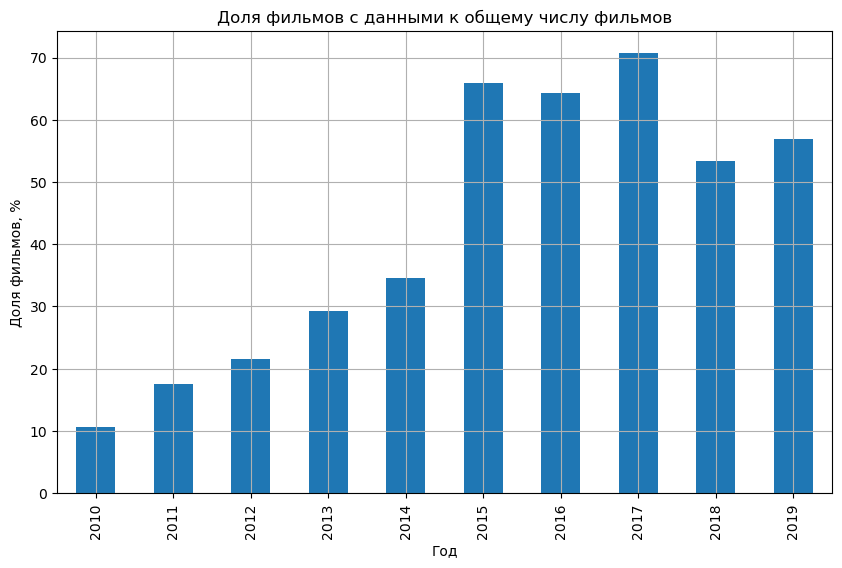

In [98]:
year_part.groupby('Год')['Доля фильмов с данными к общему числу фильмов, %'] \
.mean().plot(kind='bar', grid=True, figsize=(10, 6), title='Доля фильмов с данными к общему числу фильмов')
plt.xlabel('Год')
plt.ylabel('Доля фильмов, %');

Минимальное количество фильмов с данными о кинопрокате было в 2010 году, - 10%, До 2014 года это число росло примерно на 7% в год, а в 2015 выросло сразу на 30% - до 66%. Максимальное количество было в 2017 году - 70%. Затем опять снизилось.

- Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [99]:
box_office_sum = data.pivot_table(index='year', values='box_office', aggfunc=['sum']).reset_index()
box_office_sum.columns = ['Год', 'Общий сбор']
box_office_sum

,Год,Общий сбор
0,2010,2428654
1,2011,14102765
2,2012,6955423
3,2013,29799704
4,2014,7444951839
5,2015,39497365062
6,2016,47866299596
7,2017,48563707214
8,2018,49668402949
9,2019,48425708592


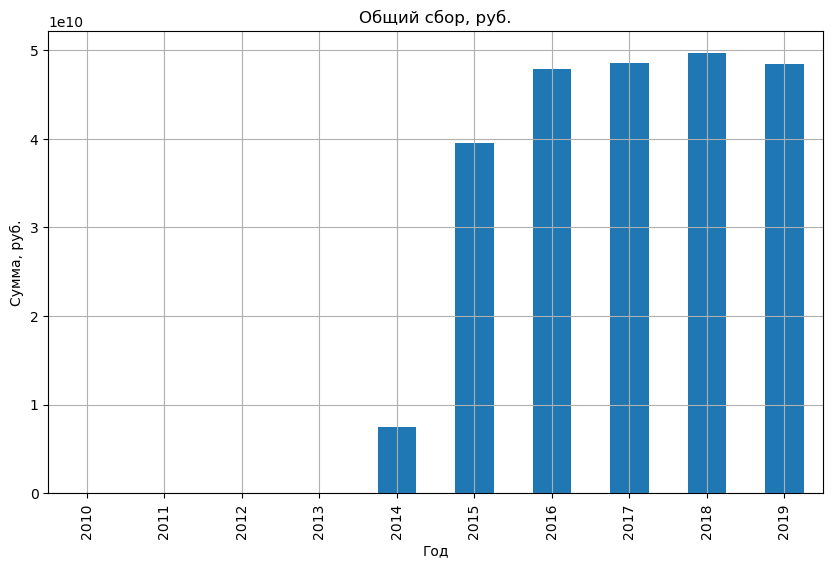

In [100]:
box_office_sum.groupby('Год')['Общий сбор'] \
.mean().plot(kind='bar', grid=True, figsize=(10, 6), title='Общий сбор, руб.')
plt.xlabel('Год')
plt.ylabel('Сумма, руб.');

Минимальная сумма сборов зафиксирована в 2010 году - 2,4 млн.руб, максимальная - в 2018 году - почти 50 млр.руб. С 2010 по 2013 год рост суммы сборов вырос в 12 раз, в 2014 - стпемительный рост - в 250 раз по сравнению с предыдущим годом. В 2015-м рост замедлился - 530% относительно 2014 года. В 2016 году рост составил 20%, следующие два года показали незначительный рост, в 2019-м незначительное понижение.

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [101]:
box_office_year = data.pivot_table(index='year', values='box_office', aggfunc=['median', 'mean']).reset_index()
box_office_year.columns = ['Год', 'Медианная сумма сбора', 'Средняя сумма сбора']
box_office_year

,Год,Медианная сумма сбора,Средняя сумма сбора
0,2010,1700.0,23130.038095
1,2011,3000.0,129383.165138
2,2012,5660.0,54339.242188
3,2013,3522.5,161954.913043
4,2014,18160.0,26684415.193548
5,2015,4920933.0,84940570.025806
6,2016,3846679.0,91000569.574144
7,2017,9968340.0,136032793.316527
8,2018,8891102.0,104565058.84
9,2019,4627798.0,91369261.49434


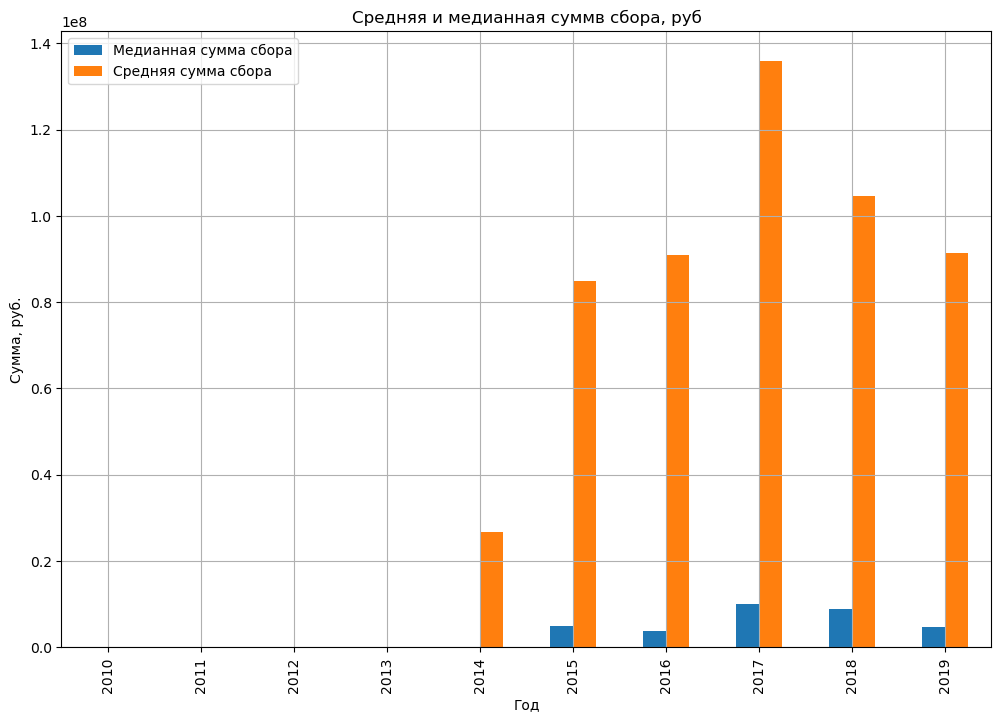

In [102]:
box_office_year.plot(x='Год', y=['Медианная сумма сбора', 'Средняя сумма сбора'], \
                     kind='bar', grid=True, figsize=(12, 8), title='Средняя и медианная суммв сбора, руб')
plt.xlabel('Год')
plt.ylabel('Сумма, руб.');

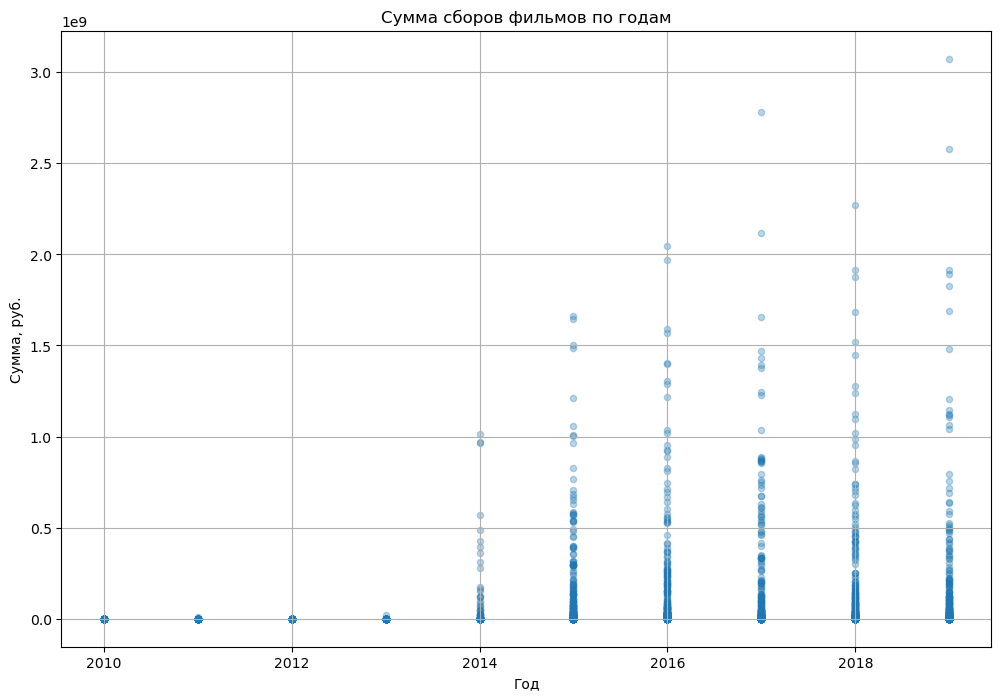

In [103]:
data.plot(x='year', y='box_office', kind='scatter', alpha=0.3, grid=True, figsize=(12, 8), 
          title='Сумма сборов фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Сумма, руб.');

Медианная сумма сбора значительно ниже средней суммы, это можно объяснить редкими выбросами - фильмами с огромными сборами.

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года?

In [104]:
data_age = data.loc[data['year'] >= 2015]
data_age = data_age.pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc=['sum']).reset_index()
data_age.columns = ['Год', '0+', '12+', '16+', '18+', '6+']
data_age

,Год,0+,12+,16+,18+,6+
0,2015,379054567,13616081989,11368120823,5432308329,8701799354
1,2016,150228839,12204446503,16664548492,6793929771,12053145991
2,2017,229598930,7851427659,18745042899,9651495581,12086142145
3,2018,32449001,14267291636,16503602284,8760085436,10104974592
4,2019,17746066,12680198743,12753418927,10121796238,12852548618


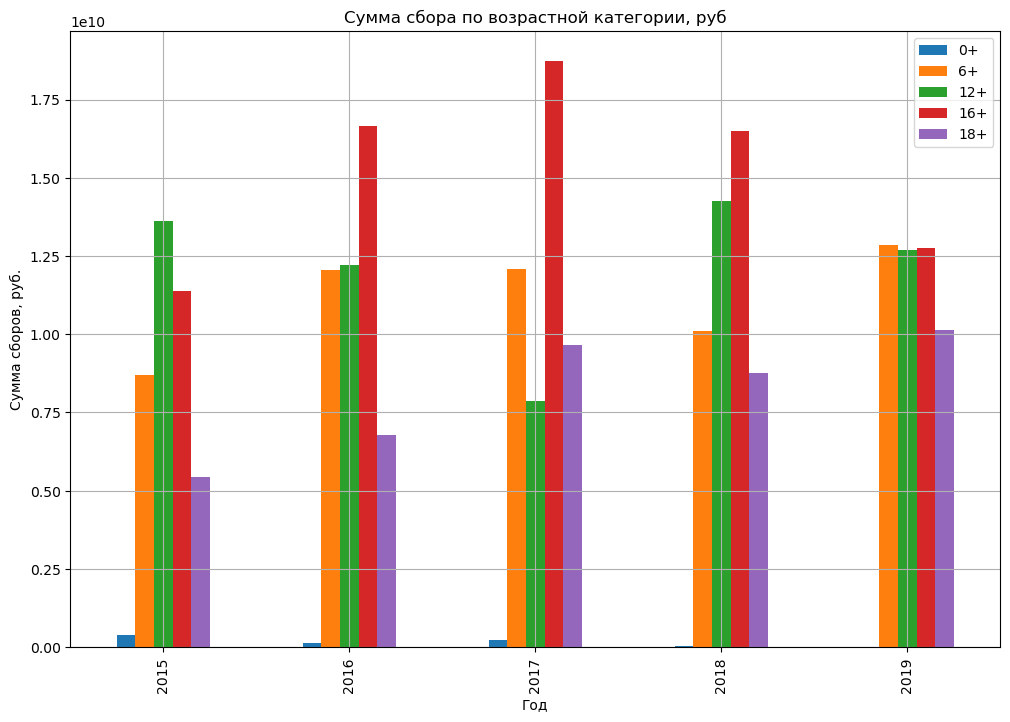

In [105]:
data_age.plot(x='Год', y=['0+', '6+', '12+', '16+', '18+'],kind='bar', grid=True, figsize=(12, 8), \
              title='Сумма сбора по возрастной категории, руб')
plt.xlabel('Год')
plt.ylabel('Сумма сборов, руб.');

Минимальные сборы показывают фильмы с ограничением по возрасту 0+, сумма сборов постоянно снижается. Категория 16+ показывала рост с 2015 по 2017 год, затем снижалась, но три года - с 2016 по 2018 показывала максимальные результаты относительно других категорий. Категория 12+ показывала противоположные показатели. Категория 6+ показывала менее выраженные колебания. Категория 18+ показывала стабильный рост. В 2019 году три категории - 6+, 12+ и 16+ показали практически равные показатели по сборам. категория 18+ отстала от них на 20%, категория 0+ продемонстрировала абсолютный минимум по сборам, собрав в 700 раз меньше других категорий.

#### Вывод.
Исследовательский анализ данных показал, что с 2010 года значительно вырос процент фильмов с данными о прокате. С 2014 года прокатные сборы начали стремительно расти и достигли максимума в 2018 году. Выяснили, что медиана по сборам ежегодно на прядок ниже среднего значения, это обусловлено единичными выбросами - кинохитами, собравшими очень много средств. Выяснили, что из года в год показатели разнились, а в 2019 году практически выровнялись. Возможно такая разница по годам связана с изменением возрастных категорий, присваеваемым фильмам.

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку

#### Рассмотрим как по годам менялось количество фильмов,  которые получили государственную поддержку.

In [106]:
data.groupby('year')['budget'].agg(['count'])

,count
year,
2010,0
2011,0
2012,0
2013,2
2014,16
2015,86
2016,61
2017,41
2018,56


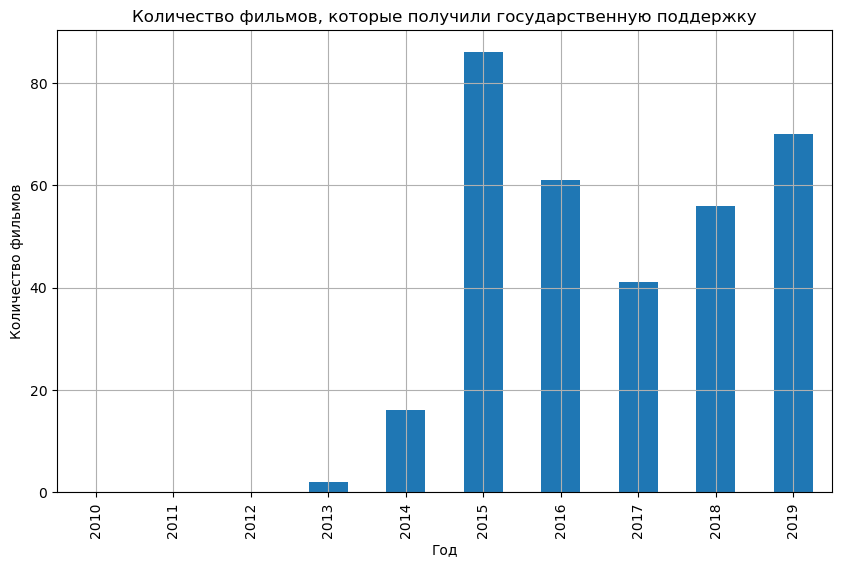

In [107]:
data.groupby('year')['budget'] \
.count().plot(kind='bar', grid=True, figsize=(10, 6), title='Количество фильмов, которые получили государственную поддержку')
plt.xlabel('Год')
plt.ylabel('Количество фильмов');

С 2010 до 2012 года фильмы не получали средства господдержки. В 2013 году таких фильмов было всего 2, в 2014 уже 16, максимальное количество фильмом снятых с использованием средств господдержки - 86 - было в 2015 году. Далее два года было уменьшение количества таких фильмов примерно на 25%, затем двухлетний рост до 70 фильмов.

#### Рассмотрим как по годам менялся бюджет фильмов, общий и средний.

In [108]:
data.groupby('year')['budget'].agg(['sum', 'mean'])

,sum,mean
year,,
2010,0,<NA>
2011,0,<NA>
2012,0,<NA>
2013,255435390,127717695.0
2014,1279484783,79967798.9375
2015,7309669207,84996153.569767
2016,7228942748,118507258.163934
2017,6972172568,170052989.463415
2018,6651694634,118780261.321429


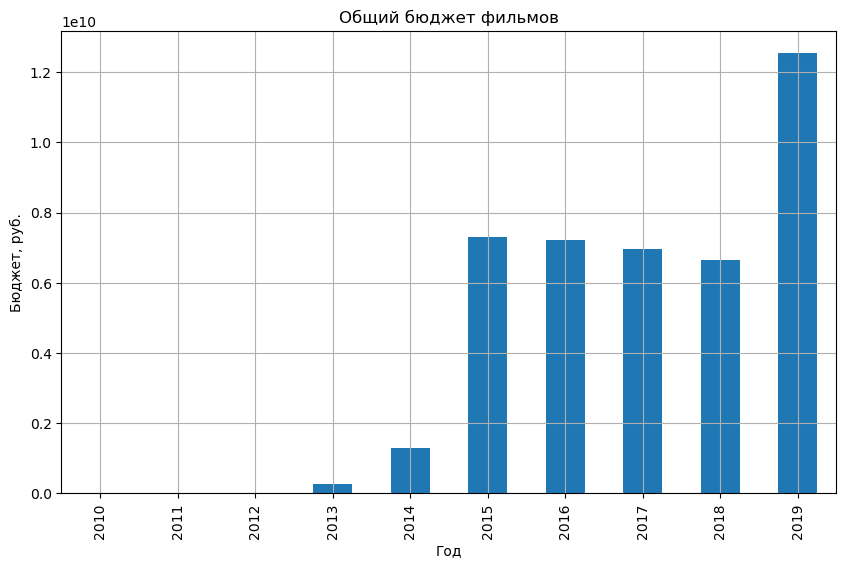

In [109]:
data.groupby('year')['budget'] \
.sum().plot(kind='bar', grid=True, figsize=(10, 6), title='Общий бюджет фильмов')
plt.xlabel('Год')
plt.ylabel('Бюджет, руб.');

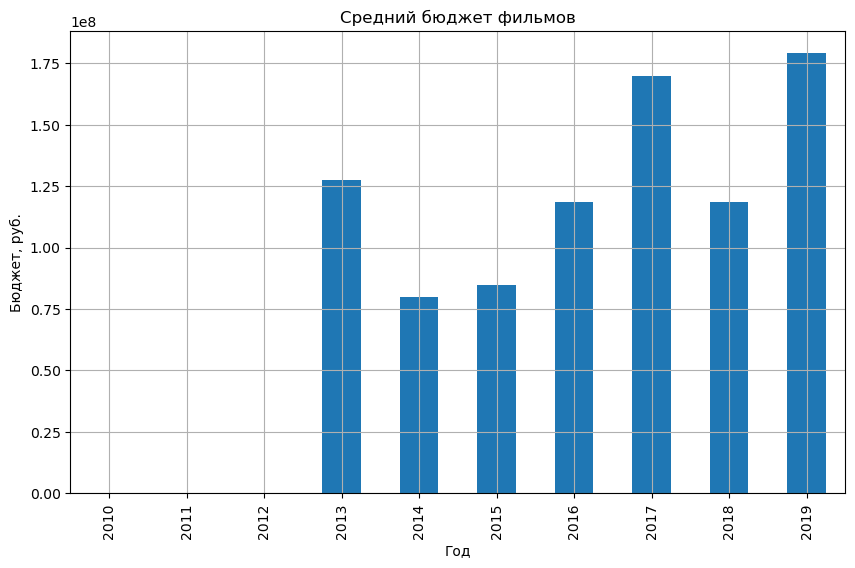

In [110]:
data.groupby('year')['budget'] \
.mean().plot(kind='bar', grid=True, figsize=(10, 6), title='Средний бюджет фильмов')
plt.xlabel('Год')
plt.ylabel('Бюджет, руб.');

Общий бюджет фильмов со средствами господдержки был минимальным в 2013 году, в 2014 вырос в пять раз. Еще в пять раз вырос в 2015 году и немного снижался до 2018 года. В 2019 общий бюджет вырос почти в два раза. 
Средний бюджет фильмов со средствами господдержки испытавал ежегодные колебания. Среднее значение зафиксировано в 2013 году, минимальное - в 2014-м, максимальное достигнуто в 2019 году.

#### Рассмотрим столбец 'ratio' (доля государственной поддержки от общего бюджета).

In [111]:
data_ratio = data[data['ratio'].notnull() & data['budget'] > 0]
data_ratio['ratio'].sort_values(ascending=False)

3385    78.474525
2538    70.000001
2379         70.0
2899         70.0
1448         70.0
          ...    
3352    12.161109
7114    11.713288
7171      7.69288
3732     6.646133
5600     4.404305
Name: ratio, Length: 95, dtype: Float64

In [112]:
data_ratio.groupby('year')['ratio'].agg(['mean'])

,mean
year,
2014,48.632235
2015,55.582758
2016,52.425962
2017,44.109053
2018,47.942912
2019,46.694087


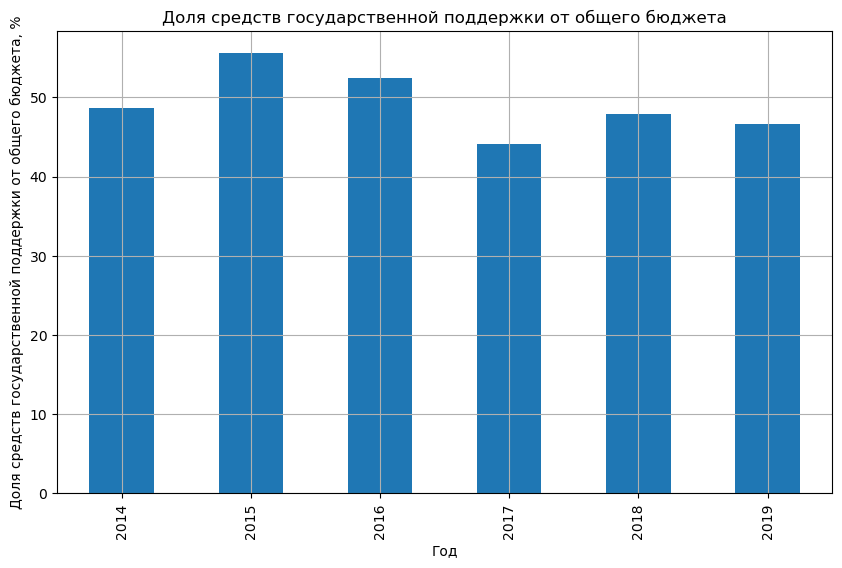

In [113]:
data_ratio.groupby('year')['ratio'] \
.mean().plot(kind='bar', grid=True, figsize=(10, 6), title='Доля средств государственной поддержки от общего бюджета')
plt.xlabel('Год')
plt.ylabel('Доля средств государственной поддержки от общего бюджета, %');

Доля средств государственной поддержки от года в год менялось в пределах 10%, иея среднее значение в районе 50%.

#### Рассмотрим соотношение возвратных и невозвратных средств государственной поддержки.

In [114]:
support_part = data_ratio.pivot_table(index='year', values=['refundable_support', 'nonrefundable_support'], \
                                aggfunc=['mean']).reset_index()
support_part.columns = ['Год', 'Возвратные средства', 'Невозвратные средства']
support_part

,Год,Возвратные средства,Невозвратные средства
0,2014,33900459.8,6000000.0
1,2015,34389473.684211,3008058.894737
2,2016,55146326.230769,13846153.846154
3,2017,99340217.5,27055555.555556
4,2018,53437500.0,10937500.0
5,2019,60000000.0,25000000.0


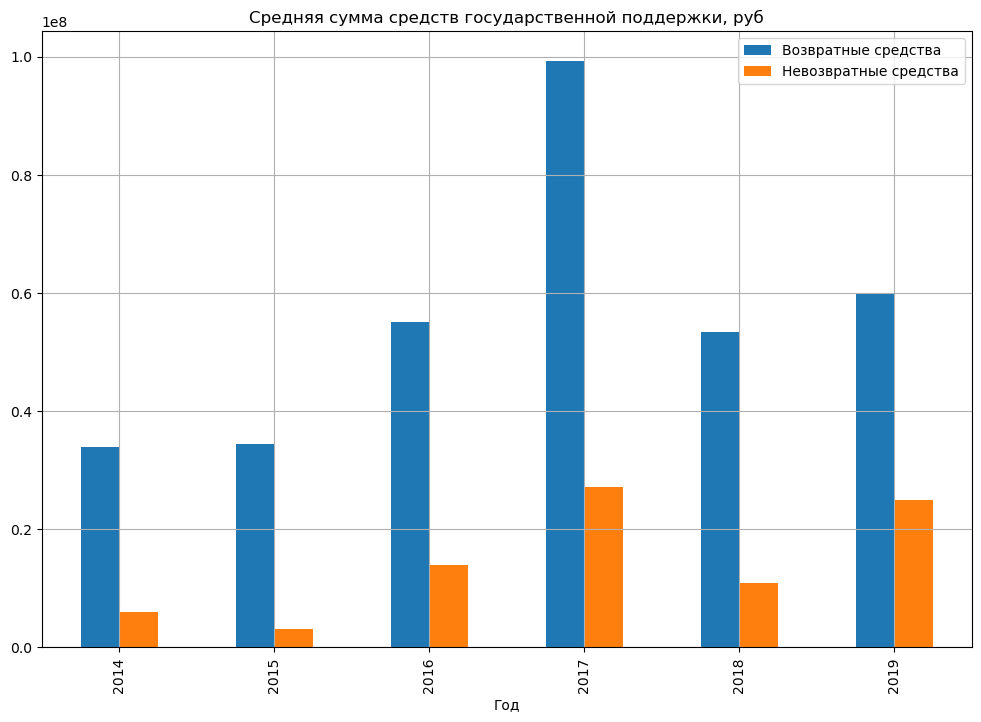

In [115]:
support_part.plot(x='Год', y=['Возвратные средства', 'Невозвратные средства'],kind='bar', grid=True, figsize=(12, 8), \
              title='Средняя сумма средств государственной поддержки, руб');

Среднее количество возвратных средств в несколько раз больше невозвратных. Максимальное показатели средних значений сумм были в 2017 году. В 2019 значения были выше средних по годам, однако соотношение возвратных и невозвратных средств имело наименьший отрыв.

#### Рассмотрим окупаемость фильмов.

In [116]:
data['payback'] = data_ratio['box_office'] - data_ratio['budget']
data_payback = data[data['payback'].notna()]
data_payback['payback'].sort_values(ascending=False)

5653     2189493953
6549     1707969287
5505     1302560113
2920      766971523
5659      584762378
           ...     
3352     -236097725
6699     -361663693
5437     -521130409
7171     -725698763
7114    -1971477244
Name: payback, Length: 94, dtype: Int64

In [117]:
data_payback.groupby('year')['payback'].agg(['mean'])

,mean
year,
2014,41735328.8
2015,-31770.789474
2016,-34194328.884615
2017,217143709.5
2018,192995643.5
2019,-329807564.6


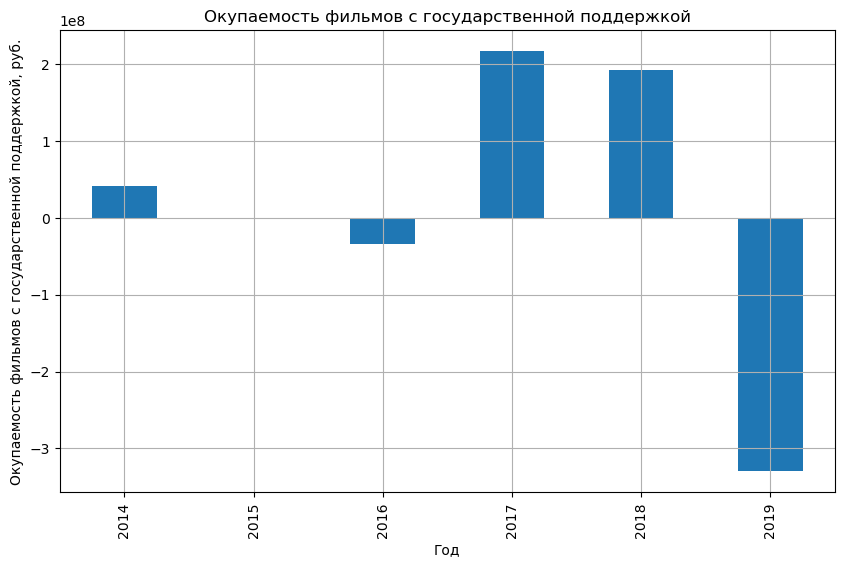

In [118]:
data_payback.groupby('year')['payback'] \
.mean().plot(kind='bar', grid=True, figsize=(10, 6), title='Окупаемость фильмов с государственной поддержкой')
plt.xlabel('Год')
plt.ylabel('Окупаемость фильмов с государственной поддержкой, руб.');

Окупаемость фильмов в 2014 году была небольшой относительно 2018 и 2017 года, когда были максимальные значения прибыли. в 2015 году практически нулевые показатели окупаемости, в 2016 - небольшой убыток, максимальные убытки были в 2019 году.

#### Рассмотрим рейтинг фильмов с государственной поддержкой.

In [119]:
data_financ = data_ratio.pivot_table(index='year', values='ratings', aggfunc=['mean']).reset_index()
data_financ.columns = ['Год', 'Рейтинг']
data_financ

,Год,Рейтинг
0,2014,6.375000
1,2015,5.905263
2,2016,5.345455
3,2017,6.052941
4,2018,6.231250
5,2019,6.636364


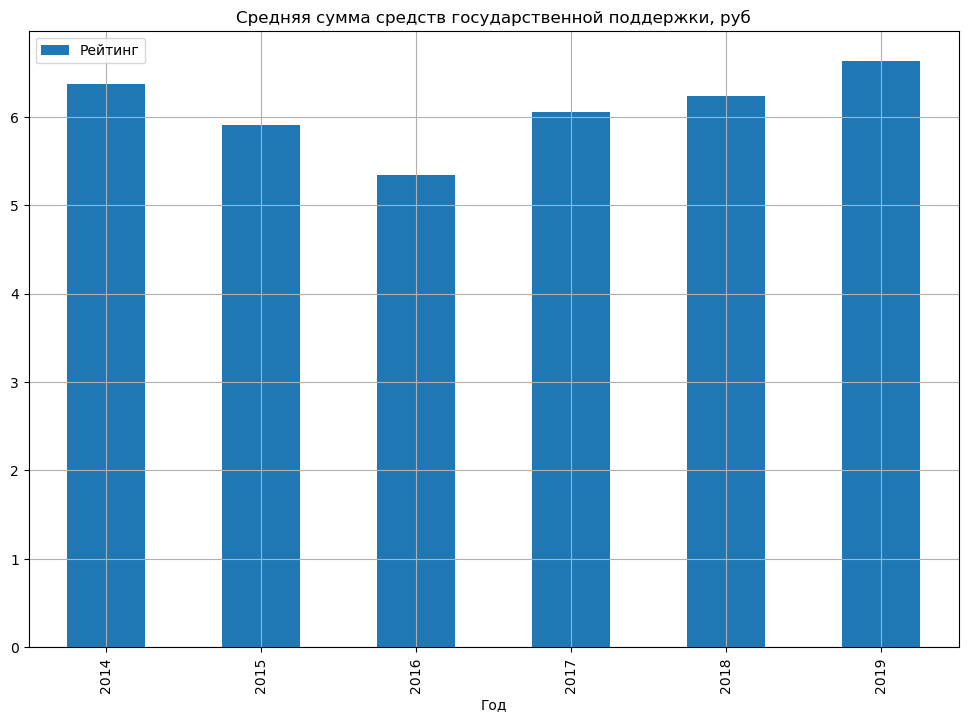

In [120]:
data_financ.plot(x='Год', y='Рейтинг', kind='bar', grid=True, figsize=(12, 8), \
              title='Средняя сумма средств государственной поддержки, руб');

In [121]:
data_ratio['ratings'].mean()

5.965168539325842

In [122]:
data['ratings'].mean()

6.479244992295841

Средний рейтинг фильмов с государственной финансовой поддержкой на Кинопоиске составил 6.0 баллов. Общий средний рейтинг фильмов на Кинопоиске составляет 6.5 баллов. В 2019 году рейтинг фильм с господдержкой составил 6.6 балов - это максимальное значение с 2014 года, тогда рейтинг был 6.4. минимальный рейтинг был в 2016 году - 5.5 баллов.

### Общий вывод.

По данным из объединённого из двух предоставленных для анализа таблиц датафрейма, содержащего информацию о фильмах, имеющих прокатные удостоверения, в числе которых фильмы частично финансируемые по программе государственной поддержке, фильмы с данными о прокатеи рейтингом на Кинопоиске, провели исследование, направленное на изучение рынка российского кинопроката, выявлены тренды. Отдельно изучены фильмы получающие средства по программе господдержки. В результате анализа, были проведены очистка и исправление данных, поск определённых зависимостей и особенностей. Выяснили, что на рынке российского кинопроката с 2010 по 2019 год значительно вырос процент фильмов, имеющих данные о прокате. Возрастные категории в 2019 году показывают практически одинаковые показатели, исключение - категория 0+, показывающая абсолютный минимум за исследуемый период. 
Фильмы с государственной поддержкой в прокате показывали хорошую прибыль в 2017 и 2018 году, однако в 2019 эти фильмы показали большой убыток. Однако на Кинопоиске в 2019 году эти фильмы имели рейтинг выше среднего по рынку и абсолютный максимум с 2014 года. Доля невозвратных средств по программе господдержки в 2019 году уменьшила разрыв с возвратными средствами, однако всё же в два с лишним раза меньше невозвратных средств.